In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
wood['Type'] = 'wood'
steel['Type'] = 'steel'
full = pd.concat([wood, steel]).reset_index()
coasters = pd.read_csv('roller_coasters.csv')

names_replace = [
    ('Grizzly \(KD\)', 'Grizzly'),
    ('Intimidator-305', 'Intimidator 305'),
    ('Superman: The Ride', 'Superman The Ride'),
    ('The ', 'Conneaut Lake')]
parks_replace = [
    ('Conneaut Lake Park', 'Conneaut Lake'),
    ('Luna Park/Coney Island', 'Luna Park'),
    ('Califoria’s Great America', 'California’s Great America'),
    ('Conneaut Lake Park', ''),
    ('Mt. Olympus Theme Park', 'Mount Olympus'),
    ('Oakwood Leisure Park', 'Oakwood'),
    ('PNE Playland', 'Playland'),
    ('ZDTs', "ZDT’s"),
    ('Fun Spot America', 'Fun Spot')]

for i in names_replace:
    full['Name'] = full['Name'].str.replace(i[0], i[1])
for i in parks_replace:
    full['Park'] = full['Park'].str.replace(i[0], i[1])

coasters.loc[683, 'height'] = 9.2
coasters.loc[730, 'height'] = 9.2

In [3]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')
big_palette = [(0.922,0.675,0.137),(0.722,0.0,0.345),(0.0,0.549,0.976),(0.0,0.431,0.0),\
           (0.0,0.733,0.678),(0.82,0.388,0.902),(0.698,0.271,0.008),(1.0,0.573,0.529),\
           (0.349,0.329,0.839),(0.0,0.776,0.973),(0.529,0.522,0.0),(0.0,0.655,0.424),\
           (0.741,0.741,0.741)]

In [4]:
def rank_dynamics(database, name, park):
    sns.set_palette('deep')
    ax = plt.subplot()
    coaster_base = database[(database['Name'] == name)&(database['Park'] == park)].reset_index(drop=True)
    coaster_base.sort_values('Year of Rank', inplace=True)
    year = coaster_base['Year of Rank']
    rank = coaster_base['Rank']
    plt.plot(year, rank, marker='o')
    ax.invert_yaxis()
    ax.set_xticks(coaster_base['Year of Rank'])
    ax.set_yticks(coaster_base['Rank'])
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(f'{name}: Rank dynamics')
    plt.show()

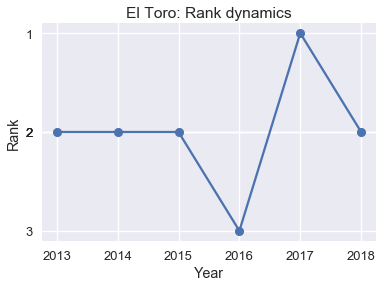

In [5]:
rank_dynamics(full, 'El Toro', 'Six Flags Great Adventure')

In [6]:
def rank_dynamics_pair(database, name_1, park_1, name_2, park_2):
    sns.set_palette('deep')
    ax = plt.subplot()
    years = set()
    ranks = set()
    for name, park in [[name_1, park_1], [name_2, park_2]]:
        coaster_base = database[(database['Name'] == name)&(database['Park'] == park)].reset_index(drop=True)
        coaster_base.sort_values('Year of Rank', inplace=True)
        year = coaster_base['Year of Rank']
        years.update(year)
        rank = coaster_base['Rank']
        ranks.update(rank)
        plt.plot(year, rank, marker='o')
    ax.invert_yaxis()
    ax.set_xticks(list(years))
    ax.set_yticks(list(ranks))
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.legend([name_1, name_2])
    plt.title(f'Rank dynamics')
    plt.show()

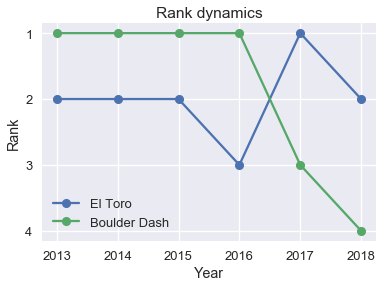

In [7]:
rank_dynamics_pair(full, 'El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce')

In [8]:
def rank_dynamics_top(database, n, title):
    sns.set_palette(big_palette)
    ax = plt.subplot()
    years = set()
    coasters_base = database[database['Rank'] <= n].reset_index(drop=True)
    coasters_base['Name_Park'] = coasters_base['Name']+' - '+coasters_base['Park']
    for name_park in sorted(set(coasters_base['Name_Park'])):
        coaster_base = coasters_base[coasters_base['Name_Park'] == name_park].reset_index(drop=True)
        coaster_base.sort_values('Year of Rank', inplace=True)
        year = coaster_base['Year of Rank']
        years.update(year)
        rank = coaster_base['Rank']
        plt.plot(year, rank, marker='o', label=name_park)
    ax.invert_yaxis()
    ax.set_xticks(list(years))
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(f'{title}: Rank dynamics')  
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

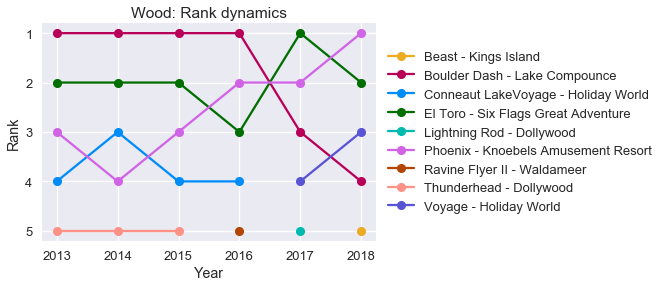

In [9]:
rank_dynamics_top(full[full['Type'] == 'wood'], 5, 'Wood')

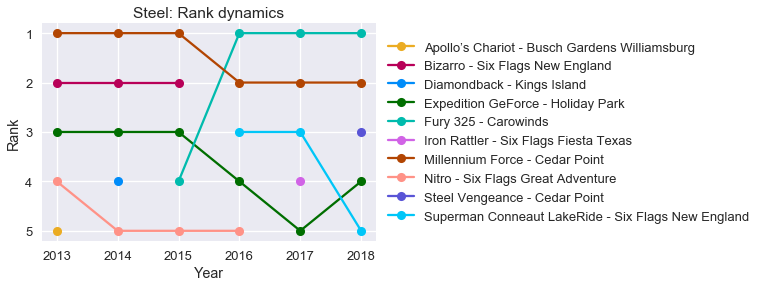

In [10]:
rank_dynamics_top(full[full['Type'] == 'steel'], 5, 'Steel')

In [11]:
def histogram(database, column, title, hist_range=None, bar=False):
    data = list(database[column].dropna().astype('int'))
    if bar == True:
        x = range(min(data), max(data)+1)
        y = [data.count(i) for i in x]
        plt.bar(x, y, width=1)
        ax = plt.gca()
        ax.set_xticks(x)
    else:
        plt.hist(data, range=hist_range)
    plt.xlabel(title)
    plt.ylabel('Count')
    plt.title(f'{title} distribution')

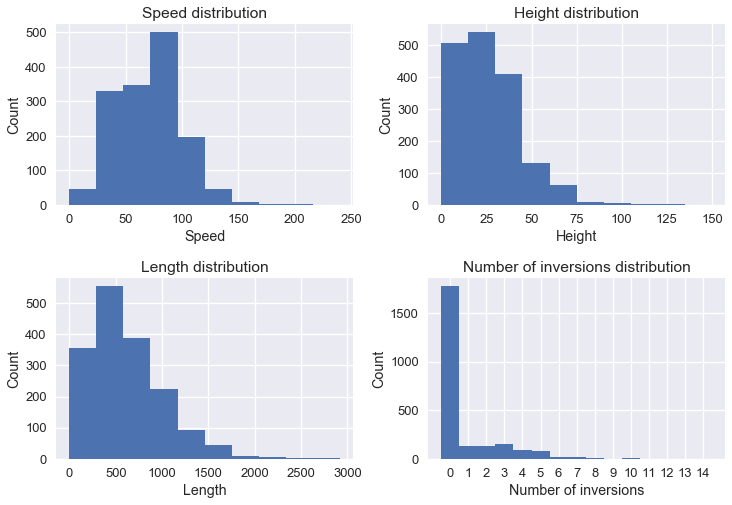

In [12]:
plt.figure(figsize=(12, 8))
sns.set_palette('deep')
plt.subplots_adjust(wspace=0.25, hspace=0.4)
plt.subplot(2, 2, 1)
histogram(coasters, 'speed', 'Speed')
plt.subplot(2, 2, 2)
histogram(coasters, 'height', 'Height', hist_range=(0,150))
plt.subplot(2, 2, 3)
histogram(coasters, 'length', 'Length')
plt.subplot(2, 2, 4)
histogram(coasters, 'num_inversions', 'Number of inversions', bar=True)
plt.show()

In [13]:
def park_inversions(database, park):
    ax = plt.gca()
    data = database[database['park'] == park].dropna(subset=['num_inversions']).reset_index()
    data.sort_values('num_inversions', inplace=True, ascending=False)
    sns.barplot(data=data, x='name', y='num_inversions', palette=big_palette)
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(data['name'], rotation=90)
    ax.tick_params(axis='x', labelsize=10)
    plt.xlabel('Park')
    plt.ylabel('Number of inversions')
    plt.title(f'{park}: Number of inversions')

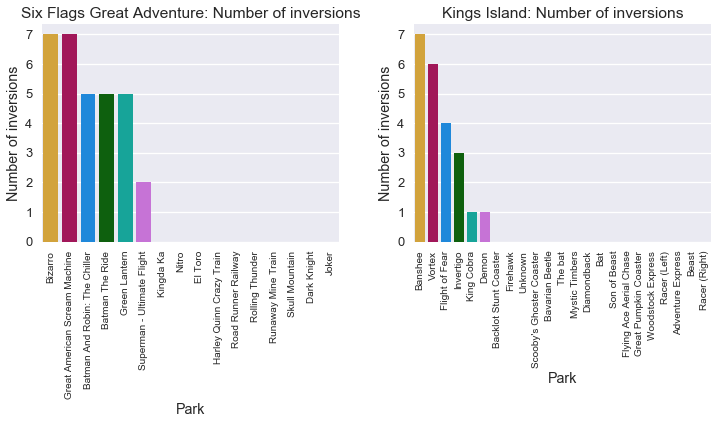

In [14]:
plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.25)
plt.subplot(1, 2, 1)
park_inversions(coasters, 'Six Flags Great Adventure')
plt.subplot(1, 2, 2)
park_inversions(coasters, 'Kings Island')
plt.show()

In [15]:
def status_pie(database):
    plt.figure(figsize=(8,4))
    sns.set_palette('deep')
    data = coasters.groupby('status').name.count().reset_index()
    data = data[data['status'].isin(['status.closed.definitely', 'status.operating'])]
    plt.pie(data.name, colors=['#fb8072', '#b3de69'], autopct='%d')
    plt.axis('equal')
    plt.title('Parks status')
    plt.legend(['closed definitely', 'operating'])
    plt.show()

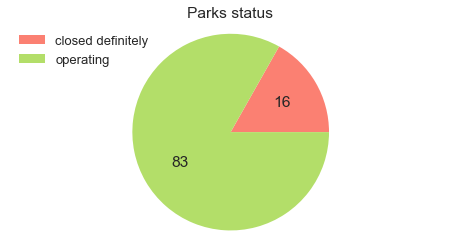

In [16]:
status_pie(coasters)

In [17]:
def scatter(database, column_1, column_2, title_1, title_2):
    data = database.dropna(subset=[column_1, column_2]).reset_index()
    plt.scatter(data[column_1], data[column_2])
    plt.xlabel(f'{title_1}')
    plt.ylabel(f'{title_2}')
    plt.title(f'{title_1} vs {title_2}')

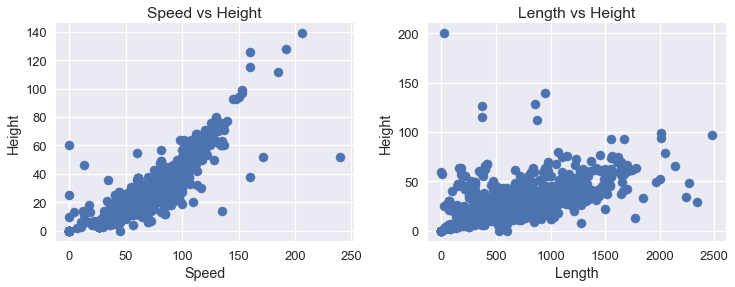

In [18]:
plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.25)
sns.set_palette('deep')
plt.subplot(1, 2, 1)
scatter(coasters, 'speed', 'height', 'Speed', 'Height')
plt.subplot(1, 2, 2)
scatter(coasters, 'length', 'height', 'Length', 'Height')
plt.show()

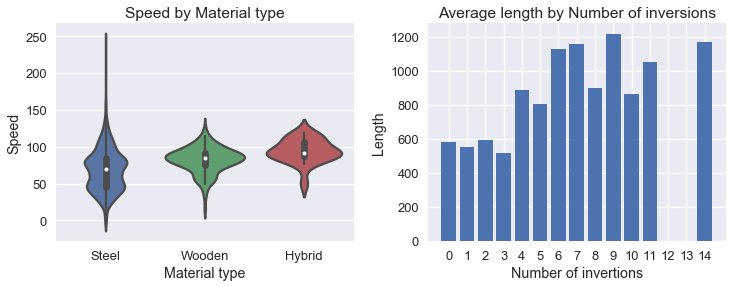

In [19]:
plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.25, hspace=0.4)
sns.set_palette('deep')

plt.subplot(1, 2, 1)
sns.violinplot(data=coasters[coasters['material_type'] != 'na'].reset_index(), x='material_type', y='speed')
plt.xlabel('Material type')
plt.ylabel('Speed')
plt.title('Speed by Material type')

plt.subplot(1, 2, 2)
data = list(coasters['num_inversions'].dropna().astype('int'))
x = range(min(data), max(data)+1)
y = [coasters[coasters['num_inversions'] == i].length.mean() for i in x]
plt.bar(x, y)
ax = plt.gca()
ax.set_xticks(x)
ax.set_xticklabels(x)
plt.xlabel('Number of invertions')
plt.ylabel('Length')
plt.title('Average length by Number of inversions')

plt.show()